## Analysing silhouette score

### 1. Load and clean data

Set the enviroment and change the path to the folder containing the data

In [1]:
# set the enviroment and change to your folder, i.e.
# setwd("Semester_Project/report_figures")

options(warn = -1)

suppressMessages({
  library(tidyverse)
  library(cowplot)
  library(data.table)
})

options(dplyr.summarise.inform = FALSE)

fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
 
## color blind palletes
# https://personal.sron.nl/~pault/#sec:qualitative 
#https://thenode.biologists.com/data-visualization-with-flying-colors/research/ 

bright = c("#4477AA","#66CCEE","#228833","#CCBB44","#EE6677","#AA3377","#BBBBBB")


Loading data, adding colnames

In [2]:
raw_data = read.table ("silhouette.tsv",header=F)

    
colnames(raw_data) =  c("id","dataset","model","fixed_curvature","universal","seed","effect","silhouette")


xtabs(~model+fixed_curvature+effect,raw_data)

, , effect = uc_epi_batch_health

          fixed_curvature
model      False True
  e12          0   60
  e2           0   60
  e2,h2,s2     0   60
  e24          0   60
  e4,h4,s4    50   60
  e6           0   60
  e8,h8,s8     0   60
  h12         60   60
  h2           0   60
  h24          0   60
  h6           0   60
  s12         60   60
  s2           0   60
  s24          0   60
  s6           0   60
  u4,u4,u4    60    0

, , effect = uc_epi_batch_location

          fixed_curvature
model      False True
  e12          0   60
  e2           0   60
  e2,h2,s2     0   60
  e24          0   60
  e4,h4,s4    50   60
  e6           0   60
  e8,h8,s8     0   60
  h12         60   60
  h2           0   60
  h24          0   60
  h6           0   60
  s12         60   60
  s2           0   60
  s24          0   60
  s6           0   60
  u4,u4,u4    60    0

, , effect = uc_epi_batch_patient

          fixed_curvature
model      False True
  e12          0   60
  e2           0   60
 

Parse the description of the latent space

In [3]:
raw_data %>% pull(model) %>% gsub("[a-z]","",.) %>% gsub (",","+",.) -> astring

raw_data$n_dim=sapply(c(1:length(astring)), function (S) {
	eval(parse(text=astring[S]))})

raw_data$model = raw_data$model %>% toupper
raw_data$components = raw_data$model %>% gsub("[0-9]","",.)

### 2. Summarising data 

In [4]:

raw_data %>% 
     group_by(model,
              fixed_curvature, universal, components, n_dim, effect) %>%
    summarise(
            
             Mean = mean( silhouette),
             Sd = sd( silhouette),
             n = n()
            
            ) %>% arrange (effect, n_dim) -> summary_data


summary_data 

model,fixed_curvature,universal,components,n_dim,effect,Mean,Sd,n
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>
E2,True,False,E,2,uc_epi_batch_health,-0.0122444569,0.0025883641,60
H2,True,False,H,2,uc_epi_batch_health,-0.0082979385,0.0038215036,60
S2,True,False,S,2,uc_epi_batch_health,-0.0078139494,0.0032100164,60
"E2,H2,S2",True,False,"E,H,S",6,uc_epi_batch_health,-0.0083373628,0.0037152795,60
E6,True,False,E,6,uc_epi_batch_health,-0.0032162204,0.0012213391,60
H6,True,False,H,6,uc_epi_batch_health,-0.0030900008,0.0014777098,60
S6,True,False,S,6,uc_epi_batch_health,-0.0030985412,0.0008067100,60
E12,True,False,E,12,uc_epi_batch_health,-0.0024180303,0.0012281509,60
"E4,H4,S4",False,False,"E,H,S",12,uc_epi_batch_health,-0.0036731963,0.0016313184,50


### 3. Plotting data, fixed curvature

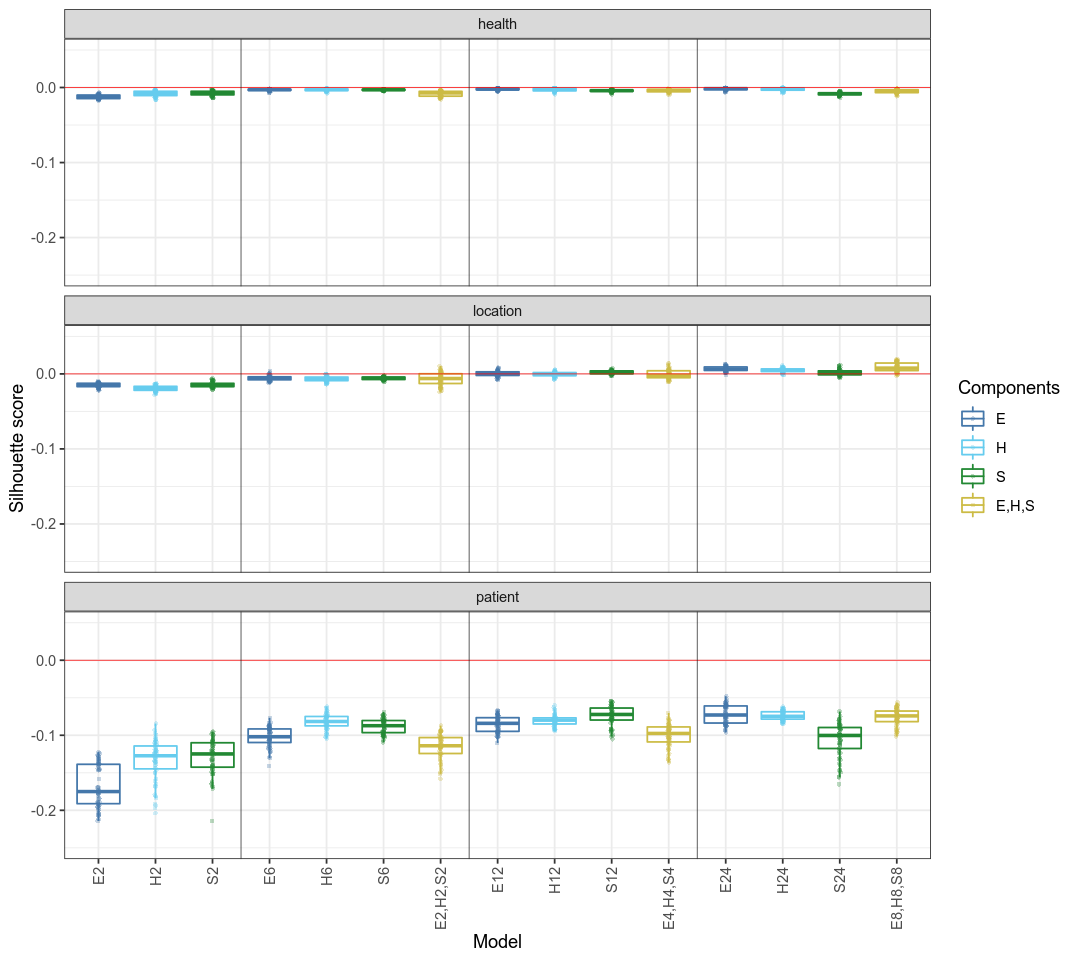

In [5]:
fig (9,8)

mylimits=c('E2','H2','S2','E6','H6','S6',
           'E2,H2,S2','E12','H12','S12',
           'E4,H4,S4','E24','H24','S24','E8,H8,S8')


# plotting fixed curvature

raw_data %>% 
   
    filter(fixed_curvature=="True" ) %>%
    mutate(
	components = factor(components, levels=c("E","H","S","E,H,S"),ordered = F),
	components_dim = factor(paste(components,n_dim,sep="")),
	components_dim= fct_inorder((components_dim)),
    dataset_effect = paste(dataset, effect))%>%
	as.data.frame %>% 

    ggplot( aes(y= silhouette,x=model,
                group = components_dim,
                color= components))+
	geom_point(position=position_jitterdodge(jitter.width=0.1,dodge.width=0.8),
               alpha=0.3,shape=16,size=1)+
	geom_boxplot(position=position_dodge2(width=0.6,padding=0.2),
                 outlier.alpha=0,
                fill=NA)+
    facet_wrap(~gsub("_","",gsub("uc_epi|batch","",effect) ),nrow=3)+
	geom_hline(yintercept=0,color="red",size=0.2)+
	geom_vline(xintercept=3.5,color="grey10",size=0.2)+
	geom_vline(xintercept=7.5,color="grey10",size=0.2)+
	geom_vline(xintercept=11.5,color="grey10",size=0.2)+
	#geom_text(data=data_labels,aes(y=adj,label=model,angle=0),
    #          position=position_dodge(width=0.75),size=3, fontface="bold",color="grey40")+
    scale_color_manual(values=bright, name="Components")+
	xlab("Model")+
	ylab("Silhouette score")+
    ylim(-0.25,0.05)+
    scale_x_discrete(limits=mylimits)+
	theme_bw()+
    theme(axis.text.x = element_text(angle=90,vjust=0.5,hjust=1)
        )

if(0){

ggsave("silhouett_fixed.pdf",w=9,h=8)
    }

### 4. Plotting data, fixed vs nonfixed curvature and universal model

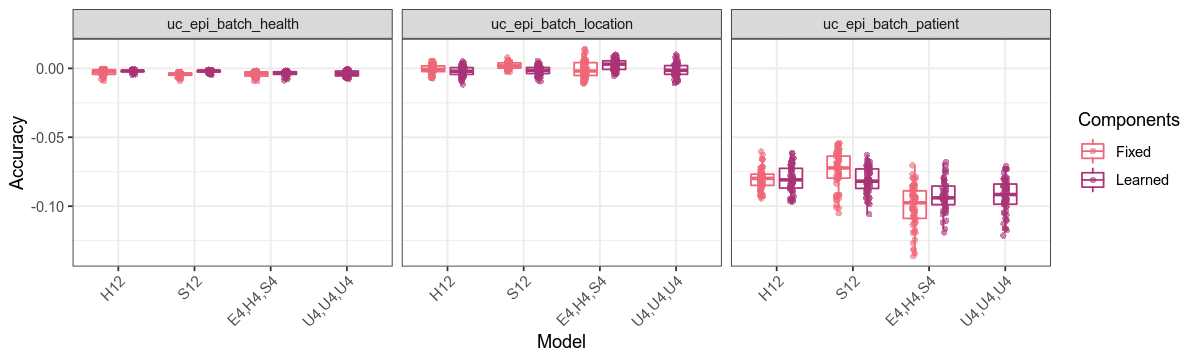

In [6]:
fig (10,3)

# plotting fixed curvature

raw_data %>% 
    
    filter (model%in%c("H12","S12","E4,H4,S4","U4,U4,U4")) %>%
    mutate(
	components = factor(components, levels=c("H","S","E,H,S","U,U,U"),ordered = F),
	model = factor(model, levels=c("H12","S12","E4,H4,S4","U4,U4,U4"),ordered = F),
    curvature = c("Learned","Fixed")[factor(fixed_curvature)])  %>%

	as.data.frame %>% 

ggplot( aes(y=silhouette,x=model,
            color= curvature,
            group= paste(curvature,model)
           ))+
	geom_point(position=position_jitterdodge(jitter.width=0.05,dodge.width=0.8),
               alpha=0.6,shape=16,size=1.5)+
	geom_boxplot(position=position_dodge2(width=0.6,padding=0.2,preserve = "single"),
                 outlier.alpha=0,
                fill=NA)+
    facet_wrap(~effect, nrow=1, scales="fixed")+
    scale_color_manual(values=bright[c(5,6)], name="Components")+
	xlab("Model")+
	ylab("Accuracy")+
	theme_bw()+
    theme(axis.text.x= element_text(angle=45,vjust=1,hjust=1))


if(0){
    
ggsave("silhouett_fixed_vs_learned.pdf",w=10,h=3)

}

In [7]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Arch Linux

Matrix products: default
BLAS/LAPACK: /home/spot/.conda/envs/lsp/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] data.table_1.14.2 cowplot_1.1.1     forcats_0.5.1     stringr_1.4.0    
 [5] dplyr_1.0.9       purrr_0.3.4       readr_2.1.2       tidyr_1.2.0      
 [9] tibble_3.1.7      ggplot2_3.3.6     tidyverse_1.3.1  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7     tidyselect_1.1.2 repr_1.1.4       haven_2.